# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Webscraping Project 4 Lab

Week 4 | Day 4

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary predictor with Logistic Regression.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being to able extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use Logistic Regression.

- Question: Why would we want this to be a classification problem?
- Answer: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range be may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com (or other sites at your team's discretion). In the second part, the focus is on using listings with salary information to build a model and predict high or low salaries and what features are predictive of that result.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is available in a `nobr` element inside of a `td` element with `class='snip`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element="jobTitle`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 

### Write 4 functions to extract each item: location, company, job, and salary.

example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- Make sure these functions are robust and can handle cases where the data/field may not be available.
- Test the functions on the results above
- Include any other features you may want to use later (e.g. summary, #of reviews...)

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

### Complete the following code to collect results from multiple cities and starting points. 
- Indeed.com only has salary information for an estimated 20% of job postings. You may want to add other cities to the list below to gather more data. 
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different

In [146]:
################################################################
############### EDIT THESE CONSTANTS
############### 
###############        EDIT THESE CONSTANTS

PHANTOM_PATH = '/Applications/anaconda/anaconda/bin/phantomJS'
MAX_RESULTS_PER_CITY = 1000        ### DO NOT SET MORE THAN 1000
URL_SEARCH_TERM = 'Data Scientist' ### DO NOT SET MORE THAN SINGLE SEARCH TERM (TITLE)
CITY_SET = ['New York', 'Chicago', 'San Francisco', 'Austin', 'Atlanta', 'Boston', 'Seattle',\
            'Los Angeles','Washington, DC', 'San Jose','Denver', 'Atlanta','Houston',\
            'Dallas','Nashville','San Diego','Cleveland','Minneapolis','Baltimore','Philadelphia',\
            'San Diego', 'Detroit', 'Tampa', 'Phoenix', 'Miami', 'Orlando', 'Sacramento', 'St. Louis',\
            'Pittsburgh', 'Portland', 'Indianapolis', 'Charlotte', 'Hartford', 'Cincinatti', 'Columbus',\
            'Kansas City', 'Greensville', 'Salt Lake City', 'Milwaukee'
            ]
###############
################################################################

In [147]:
import requests
import bs4
import pandas as pd
from bs4 import BeautifulSoup
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium import webdriver
import datetime
import urllib

def extract_location_from_resultRow(result):
    try:
        location = (result.find(class_='location').text.strip())
    except:
        location = ''
    return location

def extract_company_from_resultRow(result):
    try:
        company = (result.find(class_='company').text.strip())
    except:
        company = ''
    return company

def extract_jkid_from_resultRow(result):
    try:
        row = (result.find(class_='jobtitle turnstileLink'))
        jkid = result['data-jk']
    except: 
        jkid = ''
    return jkid

def extract_title_from_resultRow(result):
    try:
        title = (result.find(class_='turnstileLink'))
        title_text = title.text
    except: 
        title_text = ''
    return title_text

def extract_salary_from_resultRow(result):
    try:
        salary = (result.find(class_='snip').find('nobr').text)
    except:
        salary = ''
    salary_text = salary
    return salary_text

def extract_reviews_from_resultRow(result):
    try:
        reviews = (result.find(class_='slNoUnderline').text.strip().strip(' reviews').replace(',',''))
    except: 
        reviews = ''
    return reviews

def extract_stars_from_resultRow(result):
    try: 
        stars = (result.find(class_='rating')['style']).split(';background-position:')[1].split(':')[1].split('px')[0].strip()
    except: 
        stars = ''
    return stars

def extract_date_from_resultRow(result):
    try: 
        date = (result.find(class_='date').text.strip(' ago').strip())
    except: 
        date = ''
    return date

def extract_summary_from_resultRow(result):
    try: 
        summary = (result.find("span", {"itemprop" : "description"}).text.strip())
    except: 
        summary = ''
    return summary

dcap = dict(DesiredCapabilities.PHANTOMJS)
dcap["phantomjs.page.settings.userAgent"] = ("Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36")

driver = webdriver.PhantomJS(executable_path='/Applications/anaconda/anaconda/bin/phantomJS', desired_capabilities=dcap)
driver.set_window_size(1024, 768) 

for city in CITY_SET:
    job_dict = []
    now = datetime.datetime.now()
    for start in range(0, MAX_RESULTS_PER_CITY, 10):

        URL = "http://www.indeed.com/jobs?q="+urllib.quote(URL_SEARCH_TERM)+"&l="+urllib.quote(city)+"&start="+str(start)
        driver.get(URL)
        soup = BeautifulSoup(driver.page_source, "lxml")

        for i in soup.findAll("div", {"data-tn-component" : "organicJob"}):

            location = extract_location_from_resultRow(i)
            company = extract_company_from_resultRow(i)
            summary = extract_summary_from_resultRow(i)
            jkid = extract_jkid_from_resultRow(i)
            title = extract_title_from_resultRow(i)
            salary = extract_salary_from_resultRow(i)
            reviews = extract_reviews_from_resultRow(i)
            stars = extract_stars_from_resultRow(i)
            post_date = extract_date_from_resultRow(i)

            job_dict.append([location, company, summary, jkid, title, salary, stars, reviews, post_date, now, city])
            
        job_df = pd.DataFrame(job_dict, columns=['location', 'company', 'summary', 'jkid', 'title', 'salary', 'stars', 'reviews', 'post_date', 'pull_date', 'search_city'])       

    job_df.to_csv('scrape'+city+'_'+str(MAX_RESULTS_PER_CITY)+'.csv', encoding='utf-8')
        

In [148]:
import glob

interesting_files = glob.glob("*_1000.csv") 

header_saved = False
with open('master.csv','wb') as fout:
    for filename in interesting_files:
        with open(filename) as fin:
            header = next(fin)
            if not header_saved:
                fout.write(header)
                header_saved = True
            for line in fin:
                fout.write(line)

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [172]:
import numpy as np
import pandas as pd
from selenium import webdriver
import datetime
import urllib
import urllib2
import re

from time import sleep # To prevent overwhelming the server between connections
from collections import Counter # Keep track of our term counts
from nltk.corpus import stopwords # Filter out stopwords, such as 'the', 'or', 'and'
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV

In [321]:
###############
###############
###############
###############
###############
###############
###############


master_df = pd.read_csv('master.csv')

# DELETE ANY HEADER ROWS LEFT OVER FROM CSV MERGE
try: master_df = master_df[master_df['reviews'] != 'reviews'] 
except: pass
del master_df['Unnamed: 0']


###############
###############
###############
###############
###############
###############


In [322]:
###### REVIEWS CLEAN TO FLOAT
######

master_df['reviews'] = master_df['reviews'].fillna(0)

def indeed_review_cleanup(review): 
    try:
        review = review.str.replace(',','')
        review = review.strip(' reviews')
        review = review.strip(' review')
        review = review.strip('reviews')
        review = review.strip()
        review = float(review)
    except:
        #print review
        pass
    return review

master_df['clean_review'] = master_df[['reviews']].applymap(lambda x:indeed_review_cleanup(x))

master_df['clean_review'].sort_values().unique()

master_df['clean_review'] = master_df['clean_review'].astype(float)
master_df['reviews'] = master_df['clean_review']
master_df.drop('clean_review', axis=1, inplace=True)

#########  END CLEAN REVIEWS
###################

In [323]:
###### POST_DATE CLEAN TO FLOAT
######

try:
    master_df['clean_post_date'] = master_df['post_date']
except: pass


def post_date_to_day_float(dateValue):
    try:
        temp = dateValue
        dateValue.replace('s','')
        if 'day' in dateValue:
            temp = dateValue.split()[0]
        elif 'hour' in dateValue:
            temp = dateValue.split()[0]
            temp = float(temp)/24
        elif 'minute' in dateValue:
            temp = dateValue.split()[0]
            temp = float(temp)/24/60
        if '+' in dateValue:
            temp = 45           
    except: 
        pass
    return temp

master_df['clean_post_date'] = master_df[['clean_post_date']].applymap(lambda x: post_date_to_day_float(x))

master_df['clean_post_date'].sort_values().unique()

master_df['clean_post_date'] = master_df['clean_post_date'].astype(float)
master_df['post_date'] = master_df['clean_post_date']
master_df.drop('clean_post_date', axis=1, inplace=True)
master_df.rename(columns = {'post_date':'post_date_daysAgo'}, inplace=True)

#########  END CLEAN POST_DATE
###################

In [324]:
###### STARS CLEAN TO FLOAT
######


master_df['clean_stars'] = master_df['stars'].fillna(0)
master_df['clean_stars'] = master_df[['stars']].astype(float).applymap(lambda x: x//6/2)


master_df['stars'] = master_df['clean_stars']
master_df.drop('clean_stars', axis=1, inplace=True)


#########  END CLEAN STARS
###################

In [325]:
#####Create JOB_LINK column from JKID
#####

master_df['job_link'] = master_df[['jkid']].applymap(lambda x: 'http://www.indeed.com/rc/clk?jk='+x)

#########  END JOB_LINK COLUMN
###################

In [326]:
##### Location Cleanup
#####

def location_cleanup(location):
    temp = location
    temp_city = location.split(',')[0]
    try:
        temp_state = location.split(',')[1].split()[0]
    except: 
        temp_state = ''
    return temp_city+", "+temp_state
    
master_df['location_clean'] = master_df[['location']].applymap(lambda x: location_cleanup(x))
master_df['location_clean'].sort_values().unique()

master_df['location'] = master_df['location_clean']
master_df.drop('location_clean', axis=1, inplace=True)

#########  END LOCATION CLEANUP COLUMN
###################

In [327]:
##### Salary Cleanup
#####

master_df['salary'] = master_df['salary'].fillna(0)

def cleanup_salary(salary):
    if "year" in str(salary):
        temp = salary.strip(" a year")
        temp = temp.split('-')
        low_range = int(temp[0].strip().replace("$","").replace(",",""))
        high_range = int(temp[-1].strip().replace("$","").replace(",",""))
        avg = (low_range + high_range) / 2
        salary_list = [low_range,high_range,avg]
    elif "month" in str(salary):
        temp = salary.replace("a month","")
        temp = temp.split('-')
        low_range = int(temp[0].replace("$","").replace(",",""))*12
        high_range = int(temp[-1].replace("$","").replace(",",""))*12
        avg = (low_range + high_range) / 2
        salary_list = [low_range,high_range,avg]
    elif "hour" in str(salary):
        temp = salary.replace("an hour","")
        temp = temp.split('-')
        low_range = float(temp[0].replace("$","").replace(",",""))*2080
        high_range = float(temp[-1].replace("$","").replace(",",""))*2080
        avg = (low_range + high_range) / 2
        salary_list = [low_range,high_range,avg]
    else:
        salary_list = [0,0,0]
        low_range = 0
        high_range = 0
        avg = 0
        
    return low_range, high_range, avg

master_df['salary_clean'] = master_df[['salary']].applymap(lambda x: cleanup_salary(x))

master_df['salary'] = master_df['salary_clean']

master_df['sal_low'] = master_df['salary'].apply(lambda x: x[0])
master_df['sal_high'] = master_df['salary'].apply(lambda x: x[1])
master_df['sal_avg'] = master_df['salary'].apply(lambda x: x[2])

master_df.drop('salary_clean', axis=1, inplace=True)
master_df.drop('salary', axis=1, inplace=True)



#########  END SALARY CLEANUP COLUMN
###################

In [328]:
has_salary = master_df[master_df['sal_avg'] != 0].shape[0]
all_records = master_df.shape[0]
print "Job listings with salary info:", has_salary
print "Total job listings: ", all_records
print "Salaried listings / Total listings", round((float(has_salary) / all_records) * 100, 3), '%'
master_df.head(5)
master_df['title'].sort_values().unique()

master_df.shape

Job listings with salary info: 1085
Total job listings:  25623
Salaried listings / Total listings 4.234 %


(25623, 14)

In [329]:
URL = 'https://www.expatistan.com/cost-of-living/index/north-america' 
driver = webdriver.PhantomJS(executable_path=PHANTOM_PATH)
driver.set_window_size(1024, 768) 
driver.get(URL)
soup = BeautifulSoup(driver.page_source,'lxml')
print soup.prettify()

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <title>
   Cost of Living Ranking in North America (USA and Canada). Updated Oct 2016
  </title>
  <meta content="2016 Cost Of Living in US and Canada. What are the most expensive, and the cheapest, American cities?" name="description"/>
  <meta content="Cost of Living Ranking in North America (USA and Canada). Updated Oct 2016" property="og:title"/>
  <meta content="website" property="og:type"/>
  <meta content="2016 Cost Of Living in US and Canada. What are the most expensive, and the cheapest, American cities?" property="og:description"/>
  <meta content="//d2y05869ftj0yg.cloudfront.net/images/map-preview.png" property="og:image"/>
  <meta content="https://www.expatistan.com/cost-of-living/index" property="og:url"/>
  <meta content="Expatistan, cost of living comparisons" property="og:site_name"/>
  <meta content="502752123,gerardo.robledillo" property="fb:admins"/>
  <m

In [330]:
c = []
r = []
for city in soup.findAll('table',class_="city-index"):
    for cities in soup.findAll('td',class_='city-name'):
        c.append(cities.text)
    for rank in soup.findAll('td',class_='price-index'):
        r.append(rank.text)


COL = pd.DataFrame([c, r]).T
COL = COL.rename(columns = {0:'Cities',1:'price_index'})
COL['Cities'] = COL['Cities'].apply(lambda x: str(x).split(',')).apply(lambda x: x[0]).apply(lambda x: str(x).replace(' (United States)',''))
COL['price_index'] = COL['price_index'].astype(int)
new_base  = COL.loc[0,'price_index']
COL['COL_new'] = COL['price_index'].apply(lambda x: float(new_base)/x)
COL.loc[16,'Cities'] = 'Minneapolis'
COL.loc[2,'Cities'] = 'Washington, DC'
COL.loc[0,'Cities'] = 'New York'
print master_df.shape
master_df = pd.merge(master_df,COL.iloc[:,[0,-1]], left_on='search_city',right_on='Cities',how='left')
del master_df['Cities']


(25623, 14)


In [331]:
# del master_df['Unnamed: 0']
# del master_df['Unnamed: 0.1']
# del master_df['COL_new_y']
#del master_df['COL_new_x']
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25623 entries, 0 to 25622
Data columns (total 15 columns):
location             25623 non-null object
company              25614 non-null object
summary              25623 non-null object
jkid                 25623 non-null object
title                25623 non-null object
stars                19179 non-null float64
reviews              25623 non-null float64
post_date_daysAgo    25623 non-null float64
pull_date            25623 non-null object
search_city          25623 non-null object
job_link             25623 non-null object
sal_low              25623 non-null float64
sal_high             25623 non-null float64
sal_avg              25623 non-null float64
COL_new              24803 non-null float64
dtypes: float64(7), object(8)
memory usage: 3.1+ MB


In [338]:
#need to add more to filter out the titles from mid to senior or entry

senior = ['sr','senior','lead','instructor','principal', 'director','manager','consultant']
mid = []
entry = ['associate','Associate','intern','junior','-1']
senior_bin = []
mid_bin = []
entry_bin = []
for x in master_df['title']:
    if any(word in x.lower() for word in senior):
        senior_bin.append(1)
        mid_bin.append(0)
        entry_bin.append(0)
    elif any(word in x.lower() for word in entry):
        senior_bin.append(0)
        mid_bin.append(0)
        entry_bin.append(1)
    else:
        senior_bin.append(0)
        mid_bin.append(1)
        entry_bin.append(0)
        
# senior = ['sr','senior','lead','instructor','principal', 'director','manager','consultant','chief']
# mid = ['data','scientist','analyst','analytics','statistician',"statistical",'machine learning']
# entry = ['associate','Associate','intern','junior','-1']
# senior_bin = []
# mid_bin = []
# entry_bin = []
# other_bin = []
# for x in master_df['title']:
#     if any(word in x.lower() for word in senior):
#         senior_bin.append(1)
#         mid_bin.append(0)
#         entry_bin.append(0)
#         other_bin.append(0)
#     elif any(word in x.lower() for word in entry):
#         senior_bin.append(0)
#         mid_bin.append(0)
#         entry_bin.append(1)
#         other_bin.append(0)        
#     elif any(word in x.lower() for word in mid):
#         senior_bin.append(0)
#         mid_bin.append(1)
#         entry_bin.append(0)
#         other_bin.append(0)        
#     else:
#         senior_bin.append(0)
#         mid_bin.append(0)
#         entry_bin.append(0)
#         other_bin.append(1)        
# master_df['senior_bin'] = pd.Series(senior_bin)
# master_df['mid_bin'] = pd.Series(mid_bin)
# master_df['entry_bin'] = pd.Series(entry_bin)
# master_df['other_bin'] = pd.Series(other_bin)       

In [339]:
master_df['senior_bin'] = pd.Series(senior_bin)
master_df['mid_bin'] = pd.Series(mid_bin)
master_df['entry_bin'] = pd.Series(entry_bin)


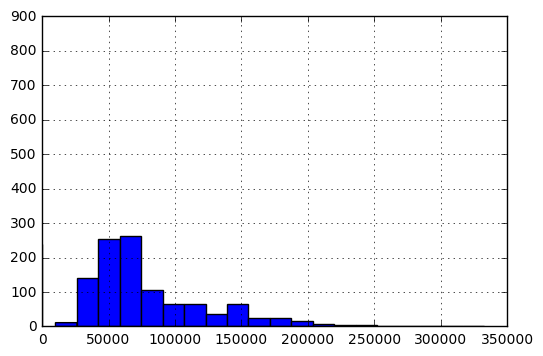

In [340]:
%matplotlib inline
import matplotlib.pyplot as plt
master_df[master_df['sal_avg'] >0 ]['sal_avg'].hist(bins=20)

has_sal_df = master_df[master_df['sal_avg'] >0 ]

has_sal_df['senior_bin'].hist(bins=20)


   senior_bin  mid_bin  entry_bin
0         238      814         33


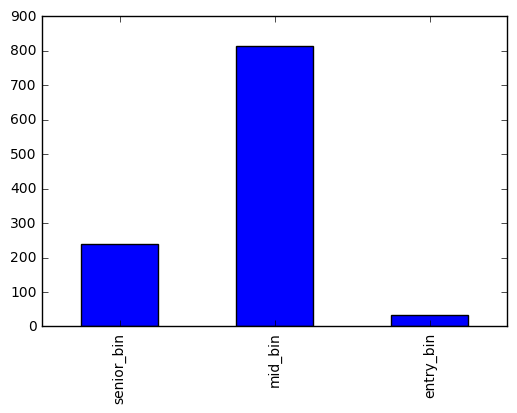

In [341]:
chart_cols = pd.DataFrame()

chart_cols['senior_bin'] = pd.Series(has_sal_df['senior_bin'].sum())
chart_cols['mid_bin'] = pd.Series(has_sal_df['mid_bin'].sum())
chart_cols['entry_bin'] = pd.Series(has_sal_df['entry_bin'].sum())
print chart_cols
chart_cols.ix[0].plot.bar();


# Let the regressions begin!

In [274]:
#calculates the mean salary or we can use median
median_sal = master_df[master_df['sal_avg'] > 0]['sal_avg'].median()
median_sal

63617.0

In [275]:
#expand on features, this creates the X and y
master_df['sal_bin'] = 0
master_df.loc[master_df['sal_avg'] > median_sal,'sal_bin'] = 1
features = master_df[(master_df['sal_avg'] > 0) & (master_df['search_city'].notnull())]

X = features.loc[:,['search_city','senior_bin','mid_bin','entry_bin']]
X = pd.get_dummies(X,columns = ['search_city'])
y = features.loc[:,'sal_bin']
X = X.astype(int)


In [277]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.33, random_state = 77) ## create train-test out of the data given

In [278]:
# this is the code from the lab, using gridsearchCV
#need to expand on C_vals

logreg = LogisticRegression(solver='liblinear')
C_vals = [.1,.5,1]
#C_vals = np.linspace(.33,.66,50)
penalties = ['l1','l2']

gs = GridSearchCV(logreg, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=3)
gs.fit(X_train, Y_train)

print gs.best_params_
logreg = LogisticRegression(C=gs.best_params_['C'], penalty=gs.best_params_['penalty'])
#logreg = LogisticRegression(C=.55, penalty=gs.best_params_['penalty'])
cv_model = logreg.fit(X_train, Y_train)
cv_pred = cv_model.predict(X_train)

{'penalty': 'l1', 'C': 1}


In [279]:
cv_model.coef_
x_list = X.columns.tolist()

#need to get coeficients into a list to bring in as a dataframe to pair up with columns


#coef_list = cv_model.coef_.tolist(

In [280]:
y_score = cv_model.decision_function(X_train)
conmat = np.array(confusion_matrix(Y_train, cv_pred, labels=[1,0]))
confusion = pd.DataFrame(conmat,index=['over_mean', 'under_mean'],
                         columns=['predicted_over_mean','predicted_under_mean'])
print confusion
# Used to verify the confusion matrix
# #confusion
# pred_series = pd.Series(cv_pred).to_frame()
# y_check = Y_train.to_frame()
# y_check.reset_index(inplace = True,drop= True)

# conmat_check = pd.concat([y_check,pred_series],axis = 1)
# conmat_check[conmat_check['sal_bin']==1][0].sum()
# # sub_yscore = y_score_sub.reshape((len(y_score_sub),1))
# # sub_yscore.shape

print classification_report(Y_train,cv_pred)
roc_auc_score(Y_train, y_score)

            predicted_over_mean  predicted_under_mean
over_mean                   292                    35
under_mean                   73                   326
             precision    recall  f1-score   support

          0       0.90      0.82      0.86       399
          1       0.80      0.89      0.84       327

avg / total       0.86      0.85      0.85       726



0.92134771178711317

Lastly, we need to clean up salary data. 
1. Some of the salaries are not yearly but hourly, these will be useful to us for now
2. The salaries are given as text and usually with ranges.

#### Filter out the salaries that are not yearly (filter those that refer to hour)

In [129]:
## YOUR CODE HERE

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary

In [9]:
## YOUR CODE HERE

### Save your results as a CSV

In [14]:
## YOUR CODE HERE